# Using of support vector machine on a dataset regarding titanic passagers

In [1]:
# import necessary libs
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# read the train and test dataset
train_data = pd.read_csv(r"datasets/titanic/train-data.csv")
test_data = pd.read_csv(r"datasets/titanic/test-data.csv")

In [3]:
# getting insight of data (shape, column, index, etc)
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
print(train_data.columns)
train_data.head()

Shape of training data : (712, 25)
Shape of testing data : (179, 25)
Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.2292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.5000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.1000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,0.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Want to have better insight on who -Survived- 
## to simplify computing, we will only keep : Age, fare and sex columns

In [4]:
# Target variable is the "survived column" >> Y
# Separate target from other column for both sets
train_y = train_data['Survived']
test_y = test_data['Survived']

# FOR X SETS
#keep all columns (careful with computation time)
#train_x = train_data.drop(columns=['Survived'],axis=1)
#test_x = test_data.drop(columns=['Survived'],axis=1)

# keep few columns 
#train_x = train_data[['Age','Fare','Sex_female','Sex_male'
train_x = train_data[['Age','Fare']]

#test_x = test_data[['Age','Fare','Sex_female','Sex_male']]
test_x = test_data[['Age','Fare']]

## base model, no parameters modified

In [5]:
# create simple SVM model (classify) and see default parameters
basemodel = svm.SVC()
# train model
basemodel.fit(train_x,train_y)
basemodel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
# ASSERTING SCORE OF BASE MODEL
predict_train = basemodel.predict(train_x)
#print('Target on train data',predict_train)
# Accuray Score
accuracy_train = accuracy_score(train_y,predict_train)
print('base model accuracy_score (%) on train dataset : ', accuracy_train*100)


predict_test = basemodel.predict(test_x)
#print('Target on train data',predict_train)
# Accuray Score
accuracy_test = accuracy_score(test_y,predict_test)
print('base model accuracy_score (%) on evaluation dataset : ', accuracy_test*100)

base model accuracy_score (%) on train dataset :  64.60674157303372
base model accuracy_score (%) on evaluation dataset :  72.06703910614524


### model is underfitting a bit

## Search for best approximation on several models

In [7]:
# we create an instance of 4 SVM and fit out data. 
# We do not scale our data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
        svm.LinearSVC(C=C, max_iter=1000),#svm.LinearSVC(C=C, max_iter=10000),
        svm.SVC(kernel='rbf', gamma=0.7, C=C),
        svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

In [8]:
from sklearn import preprocessing
# standardisation (hypothese données centrées)

#cherche le mean et standard dev du dataset (fit)
std_scale = preprocessing.StandardScaler().fit(train_x)
trainx_scaled = std_scale.transform(train_x)
testx_scaled = std_scale.transform(test_x)
print(trainx_scaled.shape)
print(trainx_scaled)

(712, 2)
[[-9.04942306e-02 -4.96597757e-01]
 [-2.06083596e-01 -4.33020011e-01]
 [ 1.90926816e-03 -3.24167322e-01]
 ...
 [ 1.90926816e-03  3.67382090e+00]
 [-1.36197725e+00 -4.18602861e-01]
 [ 4.87452598e-01 -4.33020011e-01]]


In [9]:
modelsfit = (clf.fit(trainx_scaled, train_y) for clf in models)

In [10]:
# Use train model on Train data to get training accuracy
predict_trainlist=[]
predict_testlist =[]

for clf, title in zip(modelsfit, titles):
    predict_train = clf.predict(trainx_scaled)
    predict_test = clf.predict(testx_scaled)
    predict_trainlist.append(predict_train)
    predict_testlist.append(predict_test)
    #print('Target on train data',predict_train)
    # Accuray Score
    accuracy_train = accuracy_score(train_y,predict_train)
    accuracy_test = accuracy_score(train_y,predict_train)
    print('{} accuracy_score (%) on train dataset : {}'.format(title, accuracy_train*100))
    print('{} accuracy_score (%) on test dataset : {}'.format(title, accuracy_test*100))
    print('')

SVC with linear kernel accuracy_score (%) on train dataset : 65.1685393258427
SVC with linear kernel accuracy_score (%) on test dataset : 65.1685393258427

LinearSVC (linear kernel) accuracy_score (%) on train dataset : 64.04494382022472
LinearSVC (linear kernel) accuracy_score (%) on test dataset : 64.04494382022472

SVC with RBF kernel accuracy_score (%) on train dataset : 68.53932584269663
SVC with RBF kernel accuracy_score (%) on test dataset : 68.53932584269663

SVC with polynomial (degree 3) kernel accuracy_score (%) on train dataset : 61.65730337078652
SVC with polynomial (degree 3) kernel accuracy_score (%) on test dataset : 61.65730337078652



# Try to visualise the simple model on data viz (using age and fare)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [12]:
# Take the first two features for plotting. We could avoid this by using a two-dim dataset
#X = test_x[['Age', 'Fare']].to_numpy()
X = testx_scaled
y = test_y.to_numpy()
X.shape

(179, 2)

In [13]:
# Making mesh for scatter plot
X0, X1 = X[:, 0], X[:, 1] #X['Age'], X['Fare']
xx, yy = make_meshgrid(X0, X1)

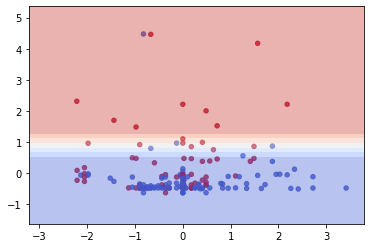

In [14]:
# test plot before loop plot
# refit first model linear
testmodel = models[0].fit(trainx_scaled, train_y)
# compute predict on test data
Z = testmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm,s=20, alpha=0.8)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)

In [21]:
# have to refit model to be able to use in zip loop 
modelsfit = (clf.fit(trainx_scaled, train_y) for clf in models)

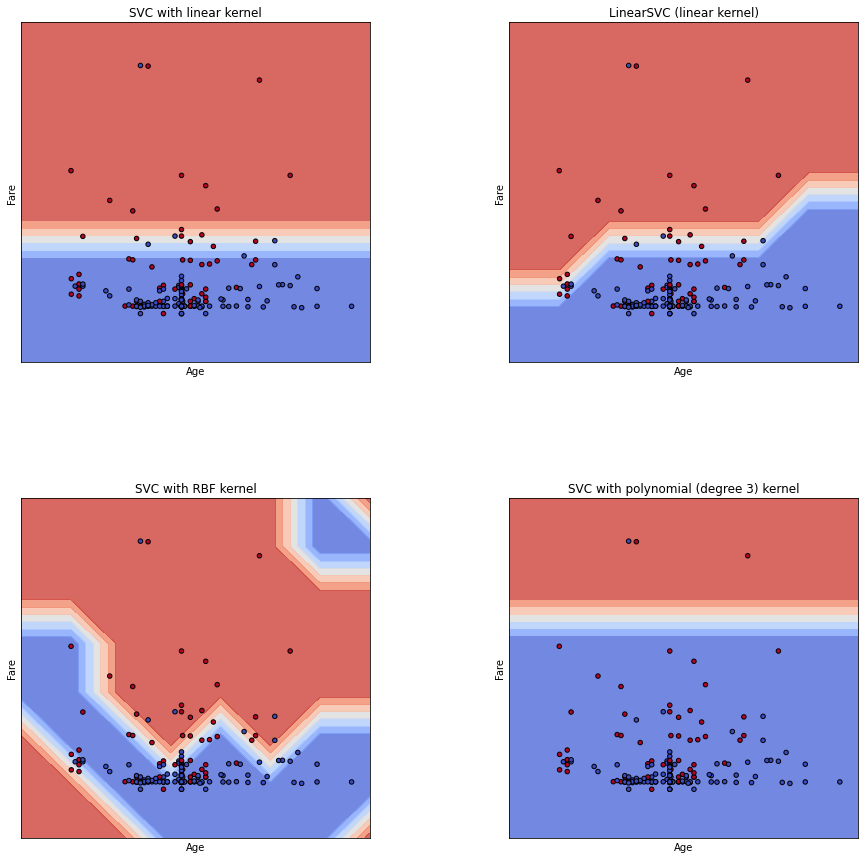

In [22]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(modelsfit, titles, sub.flatten()):
    Z = clf.predict(test_x)
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# With LinearSVC, we can interprete results like this :
# more chance of survival if young, and/or if high fare